**FastText Classification**

The goal of text classification is to assign documents different categories. In our project categories are positive, negative and neutral. Nowadays, the dominant approach to build such classifiers is machine learning, that is learning classification rules from examples. In order to build such classifiers, we need labeled data, which we have obtained as an airline_sentiment dataset.

The first step is to install and build fastText.

In [14]:
!wget https://github.com/facebookresearch/fastText/archive/0.2.0.zip
!unzip 0.2.0.zip

--2020-11-05 12:49:39--  https://github.com/facebookresearch/fastText/archive/0.2.0.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/0.2.0 [following]
--2020-11-05 12:49:39--  https://codeload.github.com/facebookresearch/fastText/zip/0.2.0
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4304799 (4.1M) [application/zip]
Saving to: ‘0.2.0.zip.3’

0.2.0.zip.3         100%[===================>]   4.10M  --.-KB/s    in 0.06s   

2020-11-05 12:49:39 (71.7 MB/s) - ‘0.2.0.zip.3’ saved [4304799/4304799]

Archive:  0.2.0.zip
7842495a4d64c7a3bb4339d45d6e64321d002ed8
replace fastText-0.2.0/.circleci/cmake_test.sh? [y]es, [n]o, [A]ll, [N]one

In [15]:
pip install fastText-0.2.0/

Processing ./fastText-0.2.0
  Created wheel for fasttext: filename=fasttext-0.8.22-cp36-cp36m-linux_x86_64.whl size=2325117 sha256=ce16ba5c0799256cc2cb0b1be5a58ca83179eb0838aad91e47622a39c2701000
  Stored in directory: /root/.cache/pip/wheels/11/5c/45/07e9483cff6a5fe6a59f48b47c7b1910978a79aed8606f8aa5
Successfully built fasttext
  Found existing installation: fasttext 0.8.22
    Uninstalling fasttext-0.8.22:
      Successfully uninstalled fasttext-0.8.22


**Getting original code working on original data**

In [16]:
!wget https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz && tar xvzf cooking.stackexchange.tar.gz

--2020-11-05 12:50:52--  https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457609 (447K) [application/x-tar]
Saving to: ‘cooking.stackexchange.tar.gz.1’

cooking.stackexchan 100%[===================>] 446.88K  --.-KB/s    in 0.04s   

2020-11-05 12:50:53 (10.7 MB/s) - ‘cooking.stackexchange.tar.gz.1’ saved [457609/457609]

cooking.stackexchange.id
cooking.stackexchange.txt
readme.txt


In [17]:
!head cooking.stackexchange.txt

__label__sauce __label__cheese How much does potato starch affect a cheese sauce recipe?
__label__food-safety __label__acidity Dangerous pathogens capable of growing in acidic environments
__label__cast-iron __label__stove How do I cover up the white spots on my cast iron stove?
__label__restaurant Michelin Three Star Restaurant; but if the chef is not there
__label__knife-skills __label__dicing Without knife skills, how can I quickly and accurately dice vegetables?
__label__storage-method __label__equipment __label__bread What's the purpose of a bread box?
__label__baking __label__food-safety __label__substitutions __label__peanuts how to seperate peanut oil from roasted peanuts at home?
__label__chocolate American equivalent for British chocolate terms
__label__baking __label__oven __label__convection Fan bake vs bake
__label__sauce __label__storage-lifetime __label__acidity __label__mayonnaise Regulation and balancing of readymade packed mayonnaise and other sauces


Splitting the data

In [18]:
!head -n 12404 cooking.stackexchange.txt > cooking.train
!tail -n 3000 cooking.stackexchange.txt > cooking.valid

First Classifier on original data

In [19]:
import fastText
modelo = fastText.train_supervised(input="cooking.train")

In [20]:
modelo.test("cooking.valid")

(3000, 0.13533333333333333, 0.05852674066599395)

**Better Model**

In [21]:
modelo1 = fastText.train_supervised(input="cooking.train", lr=1.0, epoch=25)
modelo1.test("cooking.valid")

(3000, 0.5573333333333333, 0.2410263802796598)

**Bigrams**

In [24]:
modelo2 = fastText.train_supervised(input="cooking.train", lr=1.0, epoch=25, wordNgrams=2)
modelo2.test("cooking.valid")

(3000, 0.564, 0.24390947095286147)

**Getting and preparing the transformed original data**

As mentioned in the introduction, we need labeled data to train our supervised classifier. Here since we are doing the sentiment analysis. we are replacing the original data of stack exchange questions with that of airline. The data has been prepared in another python file and made it readble by **fastText** . We will upload that file for training purpose.

In [25]:
from google.colab import files
upload = files.upload()

Saving airline_training.txt to airline_training.txt
Saving Polls1.txt to Polls1.txt


In [32]:
!head -n 14440 airline_training.txt > airline.train
!tail -n 200 airline_training.txt > airline.valid

**Our first classifier**

In [26]:
import fastText
model = fastText.train_supervised(input="airline_training.txt")

We can now use the model variable to access information on the trained model.

Now, we can test our classifier, by testing it on the data created on US Polls and see what results we get.

In [34]:
 model.test("Polls1.txt")

(200, 0.57, 0.57)

*Testing on original data subset*

In [35]:
model.test("airline.valid")

(200, 0.895, 0.895)

**Making the model better**

*more epochs and larger learning rate*

By default, fastText sees each training example only five times during training, we can increase the number of times each examples is seen (also known as the number of epochs), by using the -epoch option:

In [28]:
model1 = fastText.train_supervised(input="airline_training.txt", lr=1.0, epoch=25)
model1.test("Polls1.txt")

(200, 0.555, 0.555)

We see that there is a slight decrease in the precision and recall value of the reaults. Which makes us try something even better.

*Testing on original data subset*

In [36]:
model1.test("airline.valid")

(200, 0.905, 0.905)

**word n-grams : Bigrams**

A 'unigram' refers to a single undividing unit used as an input to a model. For instance a unigram can be a word or a letter depending in any model. In fastText, we work at the word level and thus unigrams are words.

Similarly we denote by '**bigram**' the concatenation of 2 consecutive words. So we will see if our accuracy improves by this or not.

In [29]:
model2 = fastText.train_supervised(input="airline_training.txt", lr=1.0, epoch=25, wordNgrams=2)
model2.test("Polls1.txt")

(200, 0.59, 0.59)

*Testing on original data subset*

In [37]:
model2.test("airline.valid")

(200, 1.0, 1.0)

we see that in both the cases with a few steps, we are able to significantly improve our precision score. In our original dataset precision score is increased moving up from a simple classifier to applying bigrams. Same is the case with New dataset. Although there is some difference in the precision values, but it is possibly due to sample size or human annotations. Hence, we can say that we have successfully replicated the results.

In [40]:
import pandas as pd
data = {'Model': ['First Classifier','Classifier with more epchos','Bigrams',],
        'Original Data': [0.895,0.905,1.0],
        'New Data':[0.57,0.555,0.59]
        }
df = pd.DataFrame(data, columns = ['Model', 'Original Data','New Data'])
df

,Model,Original Data,New Data
0,First Classifier,0.895,0.570
1,Classifier with more epchos,0.905,0.555
2,Bigrams,1.000,0.590


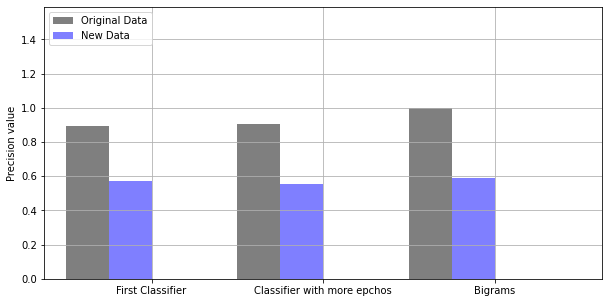

In [59]:
import matplotlib.pyplot as plt
pos = list(range(len(df['Original Data'])))
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, df['Original Data'], width, alpha=0.5, color='black')
plt.bar([p + width for p in pos], df['New Data'], width, alpha=0.5, color='Blue')
ax.set_ylabel('Precision value')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['Model'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['Original Data'] + df['New Data'])])
plt.legend(['Original Data', 'New Data'], loc='upper left')
plt.grid()
plt.show()